In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.ERROR)

#### Importing the data files

In [2]:
# Importing the data files
accident = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\accidents.csv')
casualty = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\casualty.csv')

In [3]:
# Convert the Data format
accident['date'] = pd.to_datetime(accident['date'], format='%d/%m/%Y')

In [4]:
# set UK flag colors
c_blue = '#00247d'
p_red = '#cf142b'

#### Visualizations for showing the moving average (5 months)

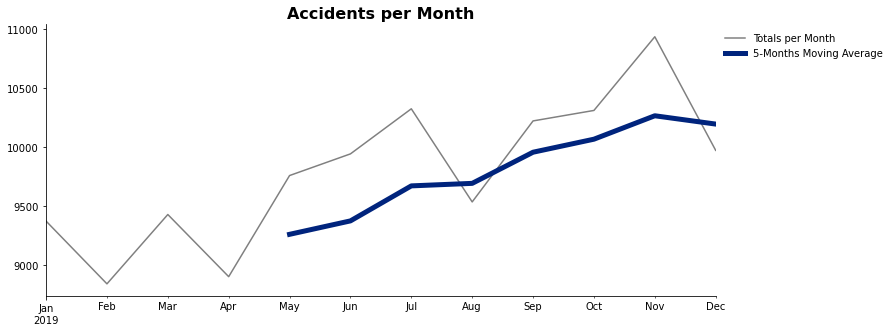

In [5]:
# Show the data trend using 5 months moving average for all the accidents
fig, ax = plt.subplots(figsize=(12,5))

accident.set_index('date').resample('M').size().plot(label='Totals per Month', color='grey', ax=ax)
# Use 10-months moving average which is similar to a popular 200 day moving average
accident.set_index('date').resample('M').size().rolling(window=5).mean()\
                    .plot(color=c_blue, linewidth=5, label='5-Months Moving Average', ax=ax)
ax.set_title('Accidents per Month', fontweight = 'bold', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(frameon=False, bbox_to_anchor=(1, 1))

sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)

In [6]:
# Create a serious dataframe to later compare accidents that are serious and fatal to the whole dataset
serious = accident[accident['accident_severity']!='Slight']

In [7]:
# Create the Fatal dataframe
fatal = accident[accident['accident_severity']=='fatal']

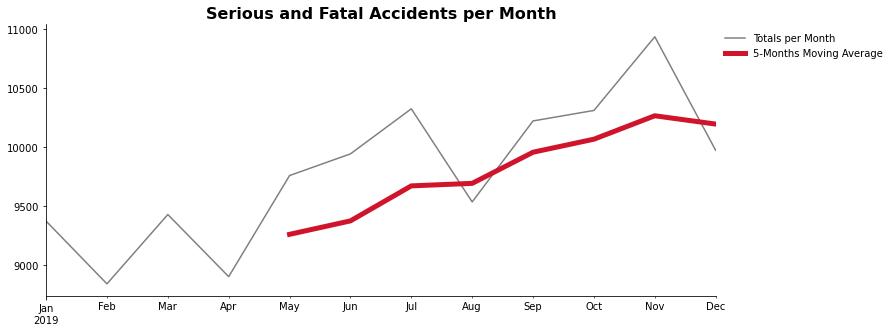

In [8]:
# Show the data trend using 5 months moving average only for serious and fatal accidents
fig, ax = plt.subplots(figsize=(12,5))

serious.set_index('date').resample('M').size().plot(label='Totals per Month', color='grey', ax=ax)
# Use 10-months moving average which is similar to a popular 200 day moving average
serious.set_index('date').resample('M').size().rolling(window=5).mean()\
                    .plot(color=p_red, linewidth=5, label='5-Months Moving Average', ax=ax)
ax.set_title('Serious and Fatal Accidents per Month', fontweight = 'bold', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(frameon=False, bbox_to_anchor=(1, 1))

sns.despine(ax=ax, top=True, bottom=False, left=False, right=True)

#### Visualizations to show the number of accidents per month and weekday

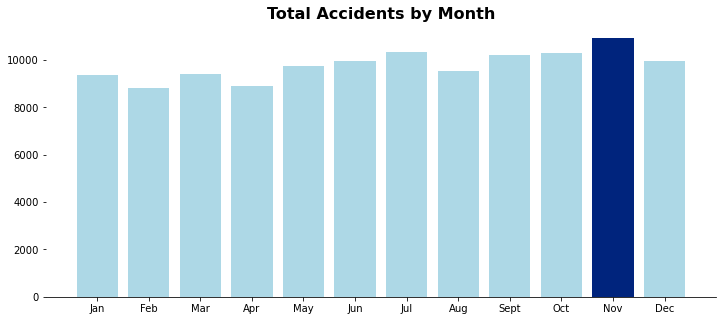

In [9]:
# Total # of accidents happened in the month of November
totals_by_month = accident['date'].dt.month.value_counts().sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(12,5))
colors = ['lightblue',c_blue,'lightblue','lightblue','lightblue','lightblue',
          'lightblue','lightblue','lightblue','lightblue','lightblue','lightblue',]

ax.bar(totals_by_month.index, totals_by_month.values, color=colors)

ax.set_title('Total Accidents by Month', fontweight = 'bold', fontsize=16)
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(ax=ax, top=True, bottom=False, left=True, right=True)

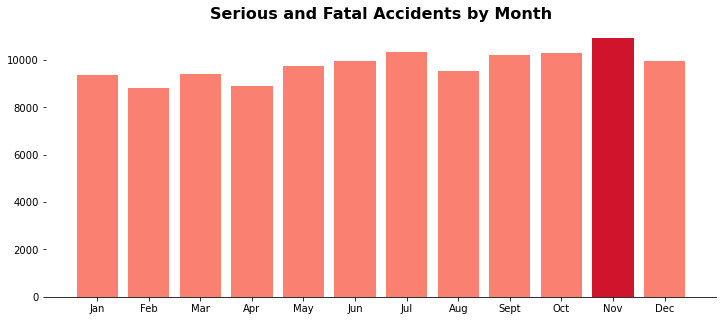

In [10]:
# Total # of serious or fatal accidents happened in the month of November as well
serious_totals_by_month = serious['date'].dt.month.value_counts().sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(12,5))
colors = ['salmon',p_red,'salmon','salmon','salmon','salmon',
          'salmon','salmon','salmon','salmon','salmon','salmon']

ax.bar(serious_totals_by_month.index, serious_totals_by_month.values, color=colors)

ax.set_title('Serious and Fatal Accidents by Month', fontweight = 'bold', fontsize=16)
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(ax=ax, top=True, bottom=False, left=True, right=True)

In [11]:
# Dates with highest # of accidents
accident.date.dt.strftime('%m/%d').value_counts().sort_values(ascending=False).head(10)

12/04    495
11/29    477
09/20    466
11/08    448
12/20    448
11/27    437
12/02    434
10/02    433
01/22    432
12/03    431
Name: date, dtype: int64

In [12]:
# Get daily time series and convert to a df
total_weekday = pd.DataFrame(accident.set_index('date').resample('1d').size().reset_index())
total_weekday['day_of_week'] = total_weekday['date'].dt.day_name()
total_weekday.columns = ['Date', 'Count','day_of_week']
weekdays = total_weekday['day_of_week']

In [13]:
# Group by weekdays and get daily average
weekday_avg = total_weekday.groupby(weekdays)['Count'].mean().reset_index()
weekday_avg.columns = ['Weekday', 'Avg_Accidents']
weekday_avg.set_index('Weekday', inplace=True)

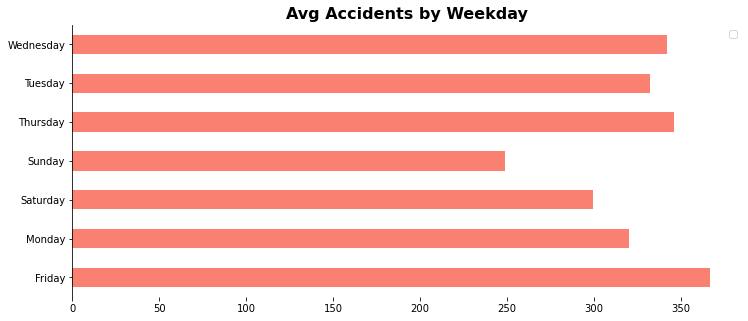

In [14]:
# avg accidents per week day

fig, ax = plt.subplots(figsize=(12,5))
#colors = ['lightblue','lightblue',c_blue,'lightblue','lightblue','lightblue','lightblue']

weekday_avg.plot(kind='barh',color=colors, ax=ax)

ax.set_title('Avg Accidents by Weekday', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend('')

sns.despine(ax=ax, top=True, bottom=True, left=False, right=True);

In [15]:
# Get daily time series and convert to a df
serious_total_weekday = pd.DataFrame(serious.set_index('date').resample('1d').size().reset_index())
serious_total_weekday['day_of_week'] = serious_total_weekday['date'].dt.day_name()
serious_total_weekday.columns = ['Date', 'Count','day_of_week']
serious_weekdays = serious_total_weekday['day_of_week']

# Group by weekdays and get daily average
serious_weekday_avg = serious_total_weekday.groupby(weekdays)['Count'].mean().reset_index()
serious_weekday_avg.columns = ['Weekday', 'Avg_Accidents']
serious_weekday_avg.set_index('Weekday', inplace=True)

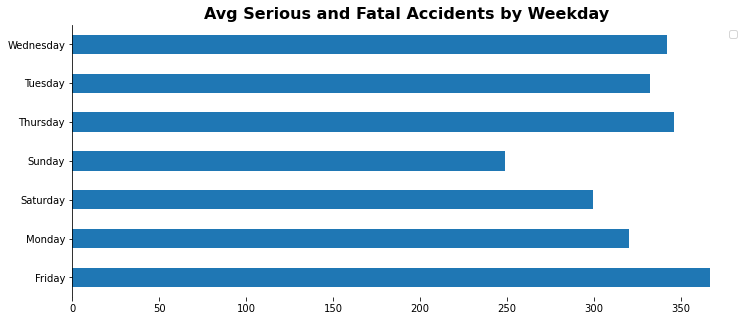

In [16]:
# average # of serios or fatal accidents per weekday
fig, ax = plt.subplots(figsize=(12,5))

serious_weekday_avg.plot(kind='barh', ax=ax)

ax.set_title('Avg Serious and Fatal Accidents by Weekday', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend('')

sns.despine(ax=ax, top=True, bottom=True, left=False, right=True);

#### Histograms of age and accidents

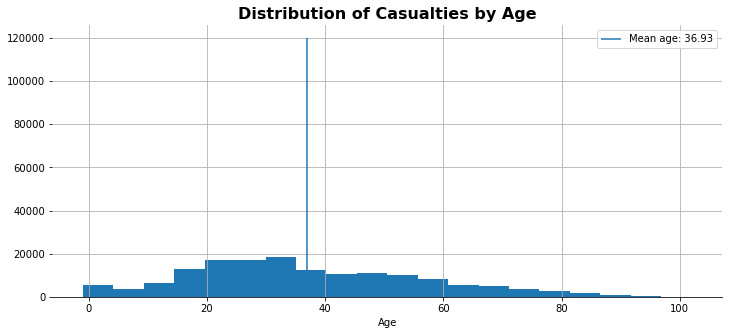

In [17]:
casualty.age_of_casualty.hist(bins=20, figsize=(12,5))
plt.title('Distribution of Casualties by Age', fontsize=16, fontweight='bold')
plt.vlines(casualty.age_of_casualty.mean(), ymin=0, ymax=120000, label='Mean age: 36.93')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

In [18]:
# 1 = Male, 2 = Female, -1 = missing data and will not be used
# More male drivers than female drivers
casualty.sex_of_casualty.value_counts(normalize=True, dropna=False)

 1    0.595888
 2    0.399326
-1    0.004727
 9    0.000059
Name: sex_of_casualty, dtype: float64

In [19]:
male_casualties = casualty[casualty['sex_of_casualty']==1]['age_of_casualty']
female_casualties = casualty[casualty['sex_of_casualty']==2]['age_of_casualty']

In [20]:
print('male mean:', male_casualties.mean())
print('female mean:', female_casualties.mean())

male mean: 36.38204130827809
female mean: 38.1389306736429


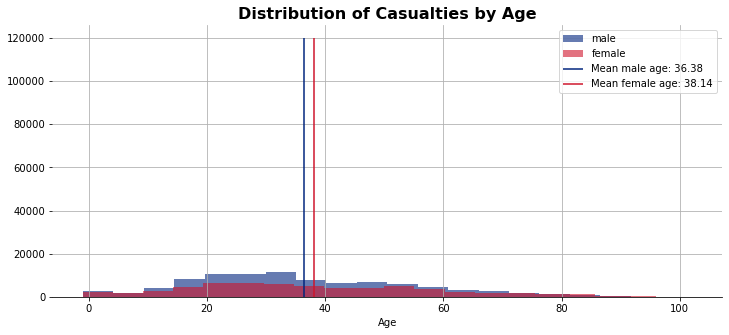

In [21]:
male_casualties.hist(bins=20, color=c_blue, figsize=(12,5), label='male', alpha=0.6)
female_casualties.hist(bins=20, color=p_red, figsize=(12,5), label='female', alpha=0.6)
plt.title('Distribution of Casualties by Age', fontsize=16, fontweight='bold')
plt.vlines(male_casualties.mean(), ymin=0, ymax=120000, color=c_blue, label='Mean male age: 36.38')
plt.vlines(female_casualties.mean(), ymin=0, ymax=120000, color=p_red, label='Mean female age: 38.14')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

In [22]:
# Filter male and female dataframes for severity not equal to 3 (slight)
male_serious_casualties = casualty[casualty['sex_of_casualty']==1][['age_of_casualty', 'casualty_severity']]
male_serious_casualties = male_serious_casualties[male_serious_casualties['casualty_severity']!=3]

female_serious_casualties = casualty[casualty['sex_of_casualty']==2][['age_of_casualty', 'casualty_severity']]
female_serious_casualties = female_serious_casualties[female_serious_casualties['casualty_severity']!=3]

male_serious_casualties = male_serious_casualties['age_of_casualty']
female_serious_casualties = female_serious_casualties['age_of_casualty']

In [23]:
print('male mean:', male_serious_casualties.mean())
print('female mean:', female_serious_casualties.mean())

male mean: 38.55893087161872
female mean: 44.37185988913787


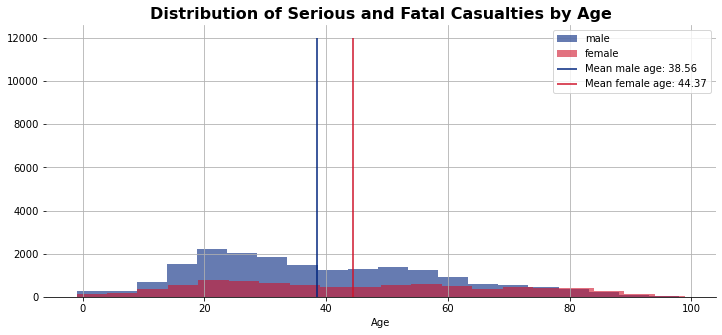

In [24]:
male_serious_casualties.hist(bins=20, color=c_blue, figsize=(12,5), label='male', alpha=0.6)
female_serious_casualties.hist(bins=20, color=p_red, figsize=(12,5), label='female', alpha=0.6)
plt.title('Distribution of Serious and Fatal Casualties by Age', fontsize=16, fontweight='bold')
plt.vlines(male_serious_casualties.mean(), ymin=0, ymax=12000, color=c_blue, label='Mean male age: 38.56')
plt.vlines(female_serious_casualties.mean(), ymin=0, ymax=12000, color=p_red, label='Mean female age: 44.37')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

Conclusion:

The number of total accidents have been increasing over 2019.
Also, number serious/fatal accidents have been increasing.
The months of the year with peak accidents are November and July.
Majority of casualties are between age 20-40, while average of casualties is around 36.
Age band with the most accidents is 20-40 years old.

#### Building a Model for predicting the fatality

In [25]:
df = pd.merge(accident,casualty,on='accident_index')

In [26]:
# Building the heatmap to check the correlation of features
def heatmap(df, figsize=(11,9), annot=False):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max())

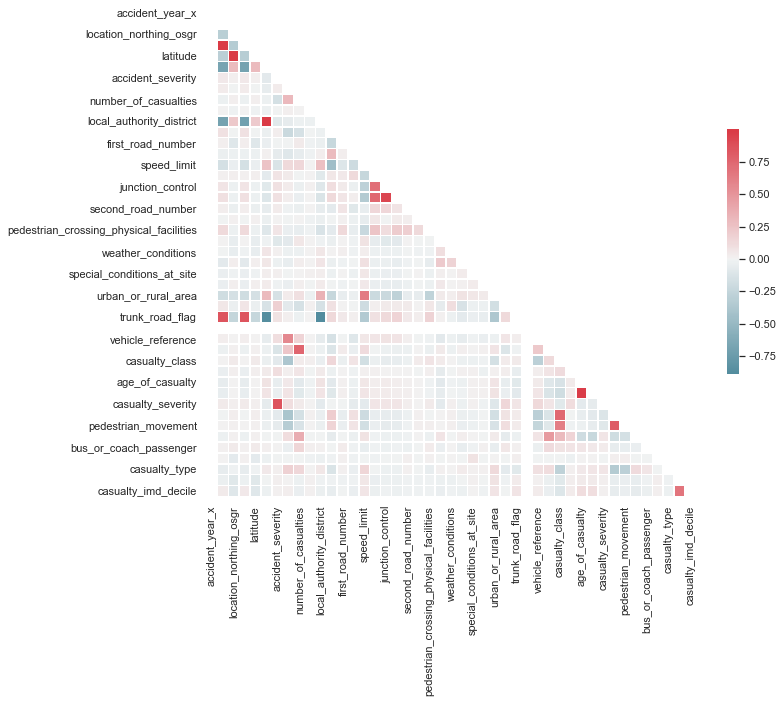

In [27]:
heatmap(df, figsize=(11,9))

In [28]:
# assign o to the severity of non-fatal
df['accident_severity'] = df['accident_severity'].replace([2,3], [0,0])

In [29]:
X = df.drop(['longitude','latitude','location_easting_osgr','location_northing_osgr','date','time','accident_severity','accident_index','local_authority_ons_district','local_authority_highway','lsoa_of_accident_location','accident_reference_x','accident_reference_y'], axis=1)
y = df['accident_severity']

In [30]:
# the data is highly unbalances, so we upsample our classes of data
from sklearn.utils import resample


# concatenate our training data back together
training_data = pd.concat([X, y], axis=1)

# separate minority and majority classes
not_safe = training_data[training_data.accident_severity==1]
safe = training_data[training_data.accident_severity==0]


# upsample minority
not_safe_upsampled = resample(not_safe,
                          replace=True, # sample with replacement
                          n_samples=len(safe), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([safe, not_safe_upsampled])

In [31]:
X = upsampled.drop('accident_severity', axis=1)
y = upsampled.accident_severity

In [32]:
# Splitting the data into train and test sets (automatically uses stratified sampling by labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
# Scaling X using StandardScaler
# Only fit training data to avoid data leakage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns=list(X_test.columns))

In [34]:
# using logistic regression to do the prediction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)


In [35]:
# we calculate the accuracy along with other metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,labels=[0,1]))


Accuracy: 0.9089540341865202
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5646
           1       0.91      0.91      0.91      5645

    accuracy                           0.91     11291
   macro avg       0.91      0.91      0.91     11291
weighted avg       0.91      0.91      0.91     11291



In [36]:
# to check if the model has overfitting or under fitting issue, we check the same metrix for both train and test data
lr2_y_preds_train = lr.predict(X_train)
print('-------- Train Data Metrics --------')
print(classification_report(y_train, lr2_y_preds_train, labels=[0,1]))

-------- Train Data Metrics --------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     13172
           1       0.91      0.91      0.91     13173

    accuracy                           0.91     26345
   macro avg       0.91      0.91      0.91     26345
weighted avg       0.91      0.91      0.91     26345



In [37]:
lr2_y_preds_test = lr.predict(X_test)
print('-------- Test Data Metrics --------')
print(classification_report(y_test, lr2_y_preds_test, labels=[0,1]))

-------- Test Data Metrics --------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5646
           1       0.91      0.91      0.91      5645

    accuracy                           0.91     11291
   macro avg       0.91      0.91      0.91     11291
weighted avg       0.91      0.91      0.91     11291



In [38]:
print("Train:", lr.score(X_train, y_train))
print("Test:", lr.score(X_test, y_test))

Train: 0.9090529512241412
Test: 0.9089540341865202


In [39]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,accident_year_x,0.000000
1,police_force,-0.514795
2,number_of_vehicles,0.233624
3,number_of_casualties,0.592372
4,day_of_week,-0.031567
5,local_authority_district,0.939984
6,first_road_class,-0.303253
7,first_road_number,-0.161894
8,road_type,0.155863
9,speed_limit,0.458852
